# **1.당뇨병 다중 선형 회귀(Diabetes Multi Regression Model)**

# **데이터 준비**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes=load_diabetes()

In [ ]:
#diabetes 데이터 정보
feature_data = diabetes.data
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
for i, feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

  #10개의 특성 이름

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


# **data와 target 지정**

In [ ]:
df_x=diabetes.data #data = df_x
df_y=diabetes.target #target = df_y

print(df_x.shape)
print(df_y.shape)

#10개의 행과 442개의 데이터가 있는것을 확인

(442, 10)
(442,)


# **데이터 프레임 생성**

In [ ]:
print('<x_data[0]> : ', df_x[0])
print()
print('<y_data[0]> : ', df_y[0])
#10개의 특성과 데이터와 첫 사람의 타깃값이 151.0인 것을 확인.
#하지만 x의 첫번째 특성인 나이가 0.03807591세인것은 사이킷런의 특성상 -0.2 ~ 0.2에
#데이터분포가 되기 때문

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<y_data[0]> :  151.0


In [ ]:
diabetes_ = load_diabetes(as_frame = True)
diabetes_df = diabetes_.frame
diabetes_df
#diabetes 안의 모든 값 확인

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
x = np.array(df_x)
x.shape


(442, 10)

In [ ]:
y = np.array(df_y)
y.shape

(442,)

# **train과 test로 나누기**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

# **모델 준비**

In [ ]:
w = np.random.rand(10) #weight값 10개
b = np.random.rand()  #bias값 책정

In [ ]:
w #weight

array([0.49096343, 0.64036559, 0.20671535, 0.74525802, 0.48192542,
       0.13928131, 0.02481113, 0.94827357, 0.67537957, 0.64945958])

In [ ]:
b #bias

0.5761965909631503

# **손실함수**

In [ ]:
def model(x, w, b):
    predictions = 0
    for i in range(10):
        predictions +=x[:, i] * w[i]
    predictions += b
    return predictions

In [ ]:
def MSE(a, b): #제곱근평균오차 함수
    mse = ((a - b) ** 2).mean()
    return mse

# loss 값 찾는 함수 
def loss(x, w, b, y):
    prediction = model(x, w, b)
    l = MSE(prediction, y)
    return l
loss_value = loss(x, w, b, y)

In [ ]:
loss_value #오차값

28886.879715256207

# **gradient 함수(기울기)**

In [ ]:
def gradient(x, w, b, y):
    # N은 가중치의 개수
    n = len(w)
    
    # y_pred 준비
    y_pred = model(x, w, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/n*2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
dw, db = gradient(x, w, b, y)
print("dw:", dw)
print("db:", db)

dw: [ -60.51329587  -13.64260541 -189.53854477 -142.53874512  -68.23797894
  -55.9594751   127.50632029 -138.86426263 -182.73567243 -123.40410166]
db: -303.1145751438656


#**하이퍼 파라미터 확습률 설정**

In [ ]:
LEARNING_RATE = 0.003

In [ ]:
losses = []

for i in range(1, 100000): #학습숫자를 높이면 높일수록 
    dW, db = gradient(x_train, w, b, y_train)
    w -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    l = loss(x_train, w, b, y_train)
    losses.append(l)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, l))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 50000 : Loss 3056.4797
Iteration 50010 : Loss 3056.4775
Iteration 50020 : Loss 3056.4753
Iteration 50030 : Loss 3056.4731
Iteration 50040 : Loss 3056.4708
Iteration 50050 : Loss 3056.4686
Iteration 50060 : Loss 3056.4664
Iteration 50070 : Loss 3056.4642
Iteration 50080 : Loss 3056.4620
Iteration 50090 : Loss 3056.4598
Iteration 50100 : Loss 3056.4575
Iteration 50110 : Loss 3056.4553
Iteration 50120 : Loss 3056.4531
Iteration 50130 : Loss 3056.4509
Iteration 50140 : Loss 3056.4487
Iteration 50150 : Loss 3056.4465
Iteration 50160 : Loss 3056.4442
Iteration 50170 : Loss 3056.4420
Iteration 50180 : Loss 3056.4398
Iteration 50190 : Loss 3056.4376
Iteration 50200 : Loss 3056.4354
Iteration 50210 : Loss 3056.4332
Iteration 50220 : Loss 3056.4310
Iteration 50230 : Loss 3056.4287
Iteration 50240 : Loss 3056.4265
Iteration 50250 : Loss 3056.4243
Iteration 50260 : Loss 3056.4221
Iteration 50270 : Loss 3056.4199
Iteration 50280 : Loss 3056.4177
Iterati

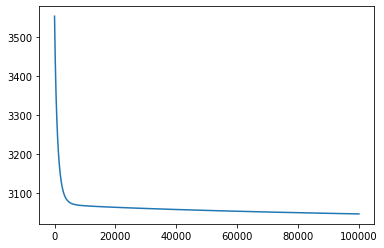

In [ ]:
plt.plot(losses)
plt.show()
#음의 기울기로 내려가며 오차값이 줄어드는 것을 확인 할 수 있다.

In [ ]:
#기울기 테스트
w, b

(array([ -13.00182073, -264.22764453,  463.00361515,  347.67602858,
        -360.53538876,  189.59584778, -136.31023983,   97.74560412,
         616.20167554,   59.61462701]), 153.0425838110836)

In [ ]:
#테스트및 훈련
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse
#테스트값, 위의 오차값이 28000에서 1/10 가까이 줄어든 것을 확인 할 수 있다.

2204.745437503957

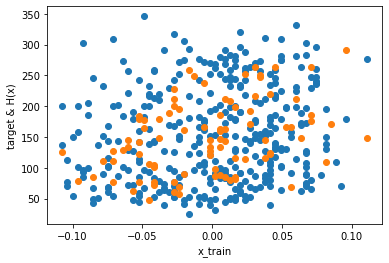

In [ ]:
plt.scatter(x_train[:, 0], y_train)
plt.scatter(x_test[:, 0], prediction)
plt.xlabel('x_train')
plt.ylabel('target & H(x)')
plt.show()

plt.show()
#위의 학습 빈도를 높이면 높일수록 테스트모델의 정확도가 올라간다.
#주황색의 점이 예측도이다.

# **2.날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

In [ ]:
import numpy as np               #numpy 불러오기
import pandas as pd              #pandas 불러오기
import matplotlib.pyplot as plt  #matplotlib 가져오기
import seaborn as sns            #seaborn 가져오기
from sklearn.model_selection import train_test_split  #train test 나누기
from sklearn.metrics import classification_report  #metrics 모듈 안의 학습 모델을 평가하기 위한 함수 불러오기
from sklearn.metrics import accuracy_score #정답배열과 예측배열을 비교하는 확률. 
from sklearn.metrics import confusion_matrix #

# **데이터 가져오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/bike-sharing-demand/train.csv'

In [ ]:
train = pd.read_csv('train.csv')
df = train.copy()
print(type(df))
print(df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
(10886, 12)


*   train 변수를 원본데이터로 유지하고 df 변수에 copy 해 넣는다.
*   df 변수는 DataFrame 자료형이다.
*   df는 Dictionary와 같은 구조를 가지며 총 12개의 정보를 가지고 있다
*   12개의 행과 10886개의 열이 있다.

In [68]:
train.head() #시각화 및 데이터 분석을 위하여 .head()로 데이터를 불러온다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [69]:
train.info() #train 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10886 non-null  datetime64[ns]
 1   season           10886 non-null  int64         
 2   holiday          10886 non-null  int64         
 3   workingday       10886 non-null  int64         
 4   weather          10886 non-null  int64         
 5   temp             10886 non-null  float64       
 6   atemp            10886 non-null  float64       
 7   humidity         10886 non-null  int64         
 8   windspeed        10886 non-null  float64       
 9   casual           10886 non-null  int64         
 10  registered       10886 non-null  int64         
 11  count            10886 non-null  int64         
 12  datetime-year    10886 non-null  int64         
 13  datetime-month   10886 non-null  int64         
 14  datetime-day     10886 non-null  int64

# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [76]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [78]:
tt = train.copy()
tt['datetime']=tt.datetime.apply(pd.to_datetime)
print((tt['datetime']))

tt['year'] = tt.datetime.apply(lambda x:x.year)

tt.head()

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,2011


*   date와 시간정보를 각 column 별로 연도, 월별, 시간별로 분석이 가능하도록 연,월,일,시,분,초 column으로 분리하고 추가합니다.

In [79]:
df['year'] = df['datetime'].dt.year 
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [80]:
df.info() #시각화를 위해 info가 정리가 된 것을 확인 가능하다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [81]:
print(train.isnull().sum()) #결측치 확인.

datetime           0
season             0
holiday            0
workingday         0
weather            0
temp               0
atemp              0
humidity           0
windspeed          0
casual             0
registered         0
count              0
datetime-year      0
datetime-month     0
datetime-day       0
datetime-hour      0
datetime-minute    0
datetime-second    0
dtype: int64


*   결측치가 존재하지 않는 것을 확인 가능하다.

In [72]:
df.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# year, month, day, hour, minute, second 데이터 개수 시각화하기

In [82]:
print('year value counts =', len(df['year'].value_counts()))
print('month value counts =',len(df['month'].value_counts()))
print('day value counts =',len(df['day'].value_counts()))
print('hour value counts =',len(df['hour'].value_counts()))
print('minute value counts =',len(df['minute'].value_counts()))
print('second value counts =',len(df['second'].value_counts()))

year value counts = 2
month value counts = 12
day value counts = 19
hour value counts = 24
minute value counts = 1
second value counts = 1


*   각 키의 값의 개수를 확인 할 수 있다.

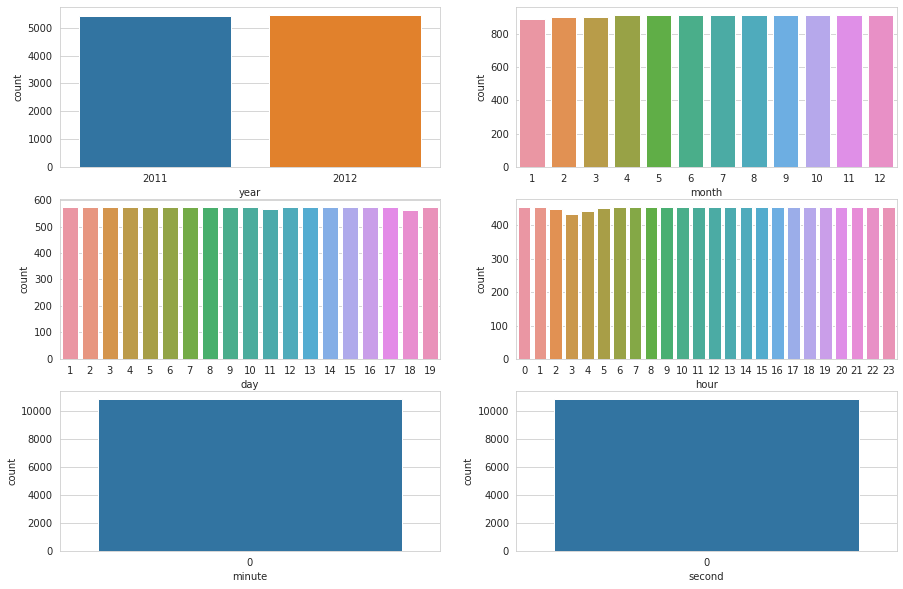

In [97]:
fig = plt.figure(figsize=(15,10))

# 차트 배경 설정
sns.set_style('whitegrid') #연도별
ax1 = fig.add_subplot(3,2,1)
sns.countplot(x='year', data = df)
ax2 = fig.add_subplot(3,2,2) #월별
sns.countplot(x='month', data = df)
ax3 = fig.add_subplot(3,2,3) #일별
sns.countplot(x='day', data = df)
ax4 = fig.add_subplot(3,2,4) #시간별
sns.countplot(x='hour', data = df)
ax5 = fig.add_subplot(3,2,5) #각 분별
sns.countplot(x='minute', data = df)
ax6 = fig.add_subplot(3,2,6) #각 초별
sns.countplot(x='second', data = df)

*   연, 월, 일, 시, 분, 초를 나눠서 보았을 때에는 확인 하는 것에 어려움이 발생한다.


# X, y 컬럼 선택 및 train/test 데이터 분리

In [98]:
print(df.shape)
df.describe()#데이터의 형태를 확인

(10886, 18)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0



*   행이 12줄에서 18줄로 바뀐 것을 확인할 수 있다.



In [103]:
drop_columns = ['datetime', 'minute', 'second', 'casual', 'registered', 'count']
selected_columns = list(df.drop(drop_columns, axis=1, inplace=False).columns)
print(drop_columns)
print(selected_columns)

['datetime', 'minute', 'second', 'casual', 'registered', 'count']
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']


*   'datetime', 'minute', 'second', 'casual', 'registered', 'count'은 우리가 하고자 하는 학습에 도움이 안되기 때문에 drop시킨다.

In [105]:
X = df.drop(drop_columns, axis=1, inplace=False).values
y = df[['count']].values

*   필요한 데이터만 따로 뽑아서 X변수에 저장
*   y는 target값인 'count'를 대입한다.

In [106]:
print(X.shape) #X값 확인
print(y.shape) #y값 확인

(10886, 12)
(10886, 1)


In [107]:
df['count'].value_counts() #count별 중복되는 값 확인

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

# **LinearRegression 모델 학습**

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


*   train_test_split함수로 train, test를 생성

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

*   LinearRegression을 불러온다.

In [113]:
model.fit(X_train, y_train) #학습

LinearRegression()

# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [114]:
predictions = model.predict(X_test) #학습된 X의 예측값 출력
predictions

array([[192.07288851],
       [165.56978764],
       [255.95802734],
       ...,
       [-42.99837648],
       [ 20.54613516],
       [232.72613122]])

In [117]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
#rmse = mse**0.5

print('mse = ', mse); print('rmse = ', rmse)

mse =  20653.60138380104
rmse =  143.71360890257068


*   sklearn에는 rmse 모듈이 없기 때문에 mse에 루트를 씌워서 계산한다.

In [118]:
X_test_df = pd.DataFrame(X_test, columns = selected_columns)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test
X_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,3.0,0.0,0.0,1.0,29.52,35.605,84.0,12.9980,2012.0,8.0,4.0,1.0,192.072889,122
1,3.0,0.0,1.0,1.0,28.70,31.820,45.0,8.9981,2011.0,8.0,11.0,1.0,165.569788,26
2,1.0,0.0,1.0,1.0,18.04,21.970,38.0,26.0027,2012.0,3.0,7.0,12.0,255.958027,215
3,2.0,0.0,1.0,1.0,22.14,25.760,88.0,0.0000,2012.0,5.0,2.0,4.0,116.658709,4
4,3.0,0.0,1.0,1.0,27.06,31.060,50.0,12.9980,2012.0,9.0,12.0,11.0,320.711697,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2.0,0.0,1.0,2.0,23.78,27.275,88.0,6.0032,2012.0,5.0,15.0,8.0,156.904834,409
2174,2.0,0.0,0.0,2.0,22.14,25.760,64.0,8.9981,2012.0,5.0,13.0,3.0,160.928488,28
2175,2.0,0.0,0.0,2.0,12.30,14.395,93.0,15.0013,2011.0,4.0,9.0,5.0,-42.998376,5
2176,1.0,0.0,1.0,1.0,7.38,9.090,43.0,12.9980,2011.0,1.0,5.0,7.0,20.546135,88


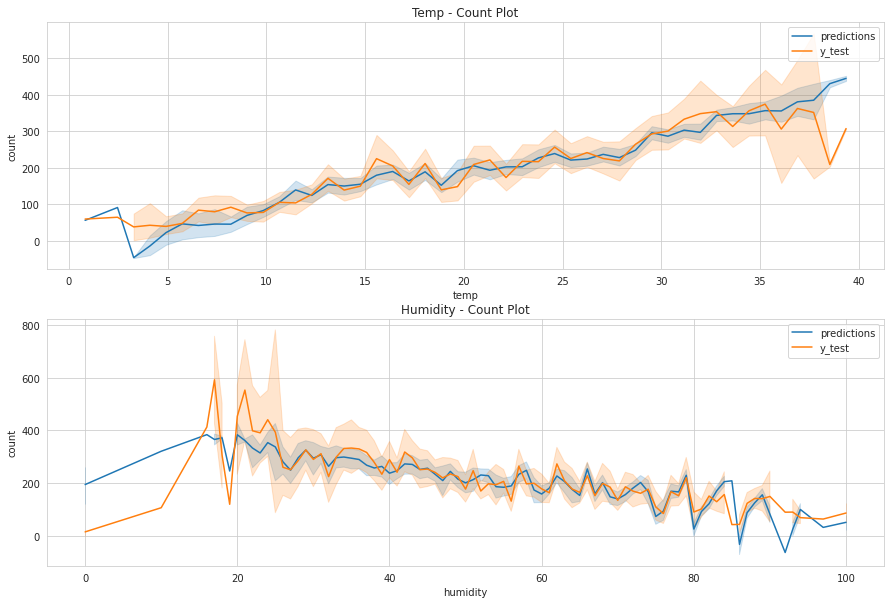

In [119]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'], label='predictions')
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'], label='y_test')
plt.title('Temp - Count Plot')
plt.ylabel('count')

plt.subplot(212)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'], label='predictions')
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'], label='y_test')
plt.title('Humidity - Count Plot')
plt.ylabel('count')

plt.show()

*   위의 온도와 습도에 따른 대여량이 학습을 통하여 확인할 수 있다.
*   테스트값과 예측값이 비슷한 기울기로 서로 움직이는 걸 확인 할 수 있다.
*   또한 습도나 온도에 따른 대여량을 앞선 barplot보다 쉽게 확인 할 수 있도록 정리가 된 것을 알 수 있다.

# 마치며

 이번 프로젝트2의 경우 앞선 예문이 아닌 밖에서 직접 csv를 import하여 학습을 진행 했다. 첫 과제에서는 sklearn의 기능이 뭔지 모르고 코딩 필사를 했다. 하지만 이번 과제의 경우 코드의 알고리즘을 더 확인을 하며 작업을 진행했다. 그렇기에 상대적으로 ai 학습과 예측, 그리고 테스트 데이터의 전반적인 메커니즘을 조금 더 이해 할 수 있었던 과제였다.